In [42]:
from random import randint, seed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
sns.set()

In [43]:
airports = pd.read_csv('D:/Data/US_airport.csv', index_col='id')
airports

,symbol,airport name,city,latitude,longitude,xcoordviz,ycoordviz
id,,,,,,,
0,ABE,Lehigh Valley Intl,Allentown,40.652083,-75.440806,1.926093e+06,337357.529978
1,CLE,Cleveland Hopkins Intl,Cleveland,41.411689,-81.849794,1.384469e+06,302554.338074
2,CLT,Charlotte Douglas Intl,Charlotte,35.214000,-80.943139,1.590611e+06,-355004.415565
3,ORD,Chicago Ohare Intl,Chicago,41.978603,-87.904842,8.790187e+05,289127.727396
4,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,33.636719,-84.428067,1.306257e+06,-582505.812325
...,...,...,...,...,...,...,...
274,RDD,Redding Muni,Redding,40.509000,-122.293389,-1.976890e+06,334403.078441
275,SUN,Friedman Mem,Hailey,43.504444,-114.296194,-1.261565e+06,515731.793677
276,TWF,Magic Valley Regional Airport,Twin Falls,42.481803,-114.487733,-1.296508e+06,406881.420680


In [44]:
airports.isna().any()

symbol          False
airport name    False
city            False
latitude        False
longitude       False
xcoordviz       False
ycoordviz       False
dtype: bool

In [45]:
airports['city'].value_counts()

Charleston     2
Columbus       2
Rochester      2
Albany         2
Washington     2
              ..
Gillette       1
Waterloo       1
Baton Rouge    1
Kalispell      1
Santa Maria    1
Name: city, Length: 269, dtype: int64

In [46]:
routes = pd.read_csv('D:/Data/US_air_traffic.txt', sep=' ')
routes.sort_values('EndTime', inplace=True, ignore_index=True)
routes

,Source,Destination,StartTime,EndTime,Duration
0,12,4,1229235300,1229244960,9660
1,16,7,1229235300,1229245500,10200
2,180,20,1229235300,1229245500,10200
3,30,2,1229233200,1229245980,12780
4,251,20,1229235000,1229246340,11340
...,...,...,...,...,...
180187,247,24,1230103800,1230125880,22080
180188,55,12,1230102000,1230126660,24660
180189,55,24,1230105300,1230127200,21900
180190,56,12,1230104340,1230128280,23940


In [47]:
routes.isna().any()

Source         False
Destination    False
StartTime      False
EndTime        False
Duration       False
dtype: bool

In [48]:
routes.EndTime.value_counts()

1229889600    79
1229976000    78
1230062400    77
1229630400    77
1229360400    77
              ..
1229487180     1
1229320020     1
1230019920     1
1229421540     1
1229496300     1
Name: EndTime, Length: 12904, dtype: int64

#### Видно,что может быть несколько заражений одновременно

#### Судя повсему,время указано в секундах. Преобразую

<AxesSubplot:>

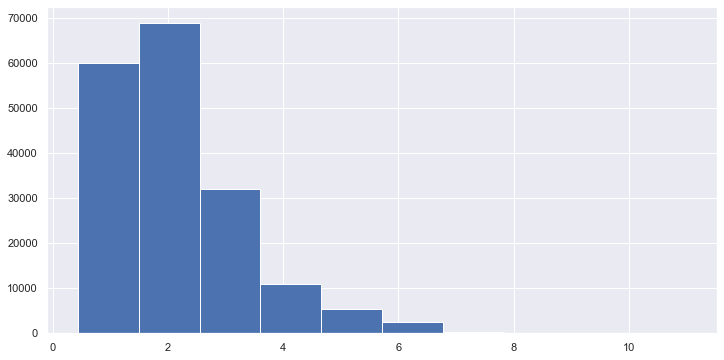

In [49]:
(routes.Duration/3600).hist()

In [50]:
routes.EndTime -= routes.EndTime.min()

#### Часть 1. Делаю симуляцию


In [51]:
def simulate_infection(first_infected_airport_id=0, p=0.01) -> dict:
    infected_airport_ids = {first_infected_airport_id}
    stats = {0: [first_infected_airport_id]}
    for src, dest, _, time, _ in routes.itertuples(index=False):
        if (dest not in infected_airport_ids) and (src in infected_airport_ids) and randint(1, int(1/p)) == 1:
            infected_airport_ids.add(dest)
            if stats.get(time) is None:
                stats[time] = []
            # stats[time].append(airports.loc[dest, 'airport name'])
            stats[time].append(dest)
            # print(len(infected_airport_ids))
    return stats

In [52]:
simulate_infection()

{0: [0],
 106140: [1],
 130680: [62],
 139680: [125],
 188940: [29],
 221520: [4],
 224220: [145],
 227040: [80],
 235560: [91],
 236220: [28],
 271740: [10],
 272340: [46],
 272640: [20],
 274740: [73],
 276300: [68],
 282480: [94],
 288600: [50],
 289920: [109],
 290580: [12, 49],
 295500: [5],
 302520: [2],
 306600: [87],
 306840: [3],
 310140: [97],
 310500: [26],
 313740: [135],
 314340: [99],
 315240: [24],
 316200: [108],
 317760: [126],
 319500: [76],
 320040: [16],
 321780: [27],
 322200: [92],
 323700: [107],
 324180: [85],
 326040: [7],
 326880: [34],
 328140: [32],
 334980: [15],
 358740: [81],
 359520: [146],
 362940: [64],
 364860: [130],
 365700: [184],
 367200: [84],
 367740: [72],
 368820: [258],
 368940: [115],
 369240: [38],
 370440: [196, 30],
 372540: [198],
 373500: [177, 88],
 376740: [75],
 377040: [110],
 377400: [105],
 378960: [103],
 381180: [48],
 381840: [8],
 382620: [89],
 383340: [71],
 384360: [217],
 385440: [95],
 387240: [21],
 387600: [65],
 390840

#### Часть 2. Как инфекционность (вероятность заражения) болезни влияет на скорость распространения?

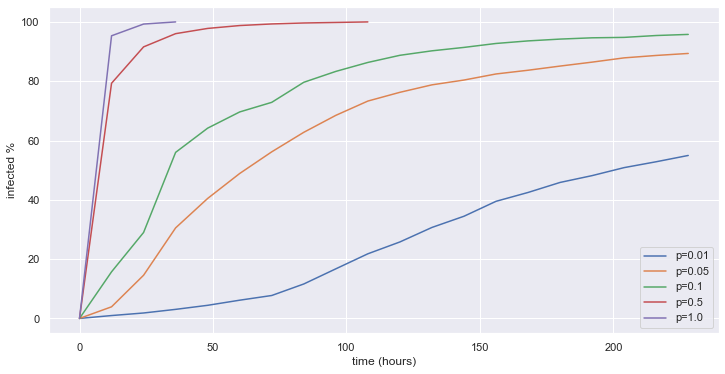

In [72]:
start_time = routes.EndTime.min()
time_diff = 12*60*60
stat_len = int(np.ceil((routes.EndTime.max() - routes.EndTime.min()) / time_diff))
probs = [0.01, 0.05, 0.1, 0.5, 1.]
legend = []
airports_counts = len(airports)-1
for p in probs:
    stats = [[] for _ in range(stat_len)]
    for _ in range(10):
        simulation_data = simulate_infection(p=p)
        time_point = start_time
        infected_airports_count = 0
        i = 0
        for time, airport_list in simulation_data.items():
            if time >= time_point + time_diff:
                stats[i].append(infected_airports_count / airports_counts)
                time_point += time_diff
                i += 1
            infected_airports_count += len(airport_list)
    x = [x*12 for x in range(stat_len+1)]
    y = [0] + [(100*sum(y)/len(y) if len(y) > 0 else None) for y in stats]
    plt.plot(x, y)
    legend.append(f'p={p}')
plt.legend(legend)
plt.xlabel('time (hours)')
plt.ylabel('infected %')
plt.show();

#### Часть 3. Может ли информация о сети помочь предсказать, кто будет заражен?

In [73]:
import networkx as nx

#### Преобразую маршруты для создания графа

In [74]:

to_drop = set([])
graph_df = routes.groupby(['Source', 'Destination']).size() / len(routes)
for src, dest in graph_df.index:
    try:
        if (src, dest) not in to_drop:
            graph_df.loc[(src, dest)] += graph_df.loc[(dest, src)]
            to_drop.add((dest, src))
    except KeyError:
        continue
graph_df.drop(index=to_drop, inplace=True)
graph_df.name = 'weight'
graph_df = graph_df.reset_index()
graph_df

,Source,Destination,weight
0,0,1,0.000294
1,0,2,0.000211
2,0,3,0.000422
3,0,4,0.000266
4,0,5,0.000300
...,...,...,...
2083,246,3,0.000017
2084,247,56,0.000055
2085,252,253,0.000111
2086,253,255,0.000111


In [75]:
graph = nx.from_pandas_edgelist(graph_df, 'Source', 'Destination', edge_attr='weight')
graph[1][0]['weight'] == graph[0][1]['weight']

True

In [76]:
len(graph.nodes)

279

In [81]:
graph.number_of_edges()

2088

#### Посчитаю степени посредничества, центральности, близости и кластеризации

In [85]:
airports['betweenness_centrality'] = pd.DataFrame.from_dict(nx.betweenness_centrality(graph, weight='weight'), orient='index')
airports['degree_centrality'] = pd.DataFrame.from_dict(nx.degree_centrality(graph), orient='index')
airports['closeness_centrality'] = pd.DataFrame.from_dict(nx.closeness_centrality(graph), orient='index')
airports['nx.clustering'] = pd.DataFrame.from_dict(nx.clustering(graph), orient='index')
airports

,symbol,airport name,city,latitude,longitude,xcoordviz,ycoordviz,betweenness_centrality,degree_centrality,closeness_centrality,median_infection_time,nx.clustering
id,,,,,,,,,,,,
0,ABE,Lehigh Valley Intl,Allentown,40.652083,-75.440806,1.926093e+06,337357.529978,0.000000,0.017986,0.429675,0.000000,1.000000
1,CLE,Cleveland Hopkins Intl,Cleveland,41.411689,-81.849794,1.384469e+06,302554.338074,0.077059,0.208633,0.544031,4.900000,0.528736
2,CLT,Charlotte Douglas Intl,Charlotte,35.214000,-80.943139,1.590611e+06,-355004.415565,0.060242,0.237410,0.545098,3.900000,0.421911
3,ORD,Chicago Ohare Intl,Chicago,41.978603,-87.904842,8.790187e+05,289127.727396,0.287107,0.478417,0.651054,3.608333,0.170084
4,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,33.636719,-84.428067,1.306257e+06,-582505.812325,0.316325,0.561151,0.674757,3.250000,0.128950
...,...,...,...,...,...,...,...,...,...,...,...,...
274,RDD,Redding Muni,Redding,40.509000,-122.293389,-1.976890e+06,334403.078441,0.000000,0.003597,0.355045,7.433333,0.000000
275,SUN,Friedman Mem,Hailey,43.504444,-114.296194,-1.261565e+06,515731.793677,0.000000,0.003597,0.370667,8.783333,0.000000
276,TWF,Magic Valley Regional Airport,Twin Falls,42.481803,-114.487733,-1.296508e+06,406881.420680,0.000000,0.003597,0.370667,8.700000,0.000000


#### Высчитываю медиану заражения каждого города

In [87]:

airports['median_infection_time'] = [np.empty(50) for _ in range(len(airports))]

for i in range(50):
    simulation_data = simulate_infection(p=0.5)
    for time, airport_list in simulation_data.items():
        for airport_id in airport_list:
            airports.loc[airport_id, 'median_infection_time'][i] = time/3600

airports['median_infection_time'] = airports['median_infection_time'].apply(np.median)
airports

,symbol,airport name,city,latitude,longitude,xcoordviz,ycoordviz,betweenness_centrality,degree_centrality,closeness_centrality,median_infection_time,nx.clustering
id,,,,,,,,,,,,
0,ABE,Lehigh Valley Intl,Allentown,40.652083,-75.440806,1.926093e+06,337357.529978,0.000000,0.017986,0.429675,0.000000,1.000000
1,CLE,Cleveland Hopkins Intl,Cleveland,41.411689,-81.849794,1.384469e+06,302554.338074,0.077059,0.208633,0.544031,4.900000,0.528736
2,CLT,Charlotte Douglas Intl,Charlotte,35.214000,-80.943139,1.590611e+06,-355004.415565,0.060242,0.237410,0.545098,3.900000,0.421911
3,ORD,Chicago Ohare Intl,Chicago,41.978603,-87.904842,8.790187e+05,289127.727396,0.287107,0.478417,0.651054,3.333333,0.170084
4,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,33.636719,-84.428067,1.306257e+06,-582505.812325,0.316325,0.561151,0.674757,2.500000,0.128950
...,...,...,...,...,...,...,...,...,...,...,...,...
274,RDD,Redding Muni,Redding,40.509000,-122.293389,-1.976890e+06,334403.078441,0.000000,0.003597,0.355045,8.366667,0.000000
275,SUN,Friedman Mem,Hailey,43.504444,-114.296194,-1.261565e+06,515731.793677,0.000000,0.003597,0.370667,8.783333,0.000000
276,TWF,Magic Valley Regional Airport,Twin Falls,42.481803,-114.487733,-1.296508e+06,406881.420680,0.000000,0.003597,0.370667,8.700000,0.000000


#### Скаттерплоты для всех 4-х метрик

In [88]:
from scipy.stats import spearmanr

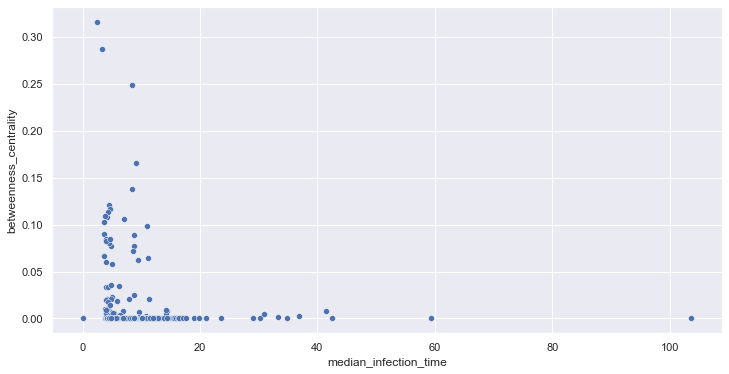

For metric: betweenness_centrality Spearmans correlation coefficient: -0.395. Samples are correlated p=6.99e-12


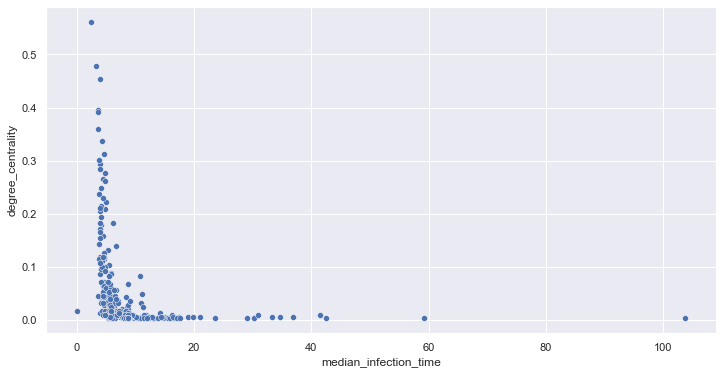

For metric: degree_centrality Spearmans correlation coefficient: -0.774. Samples are correlated p=7.63e-57


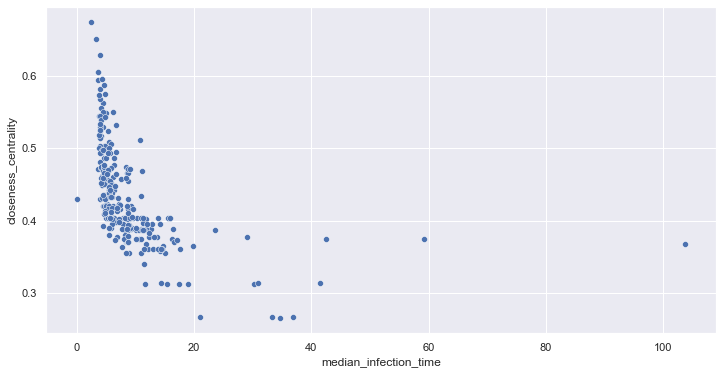

For metric: closeness_centrality Spearmans correlation coefficient: -0.806. Samples are correlated p=4.2e-65


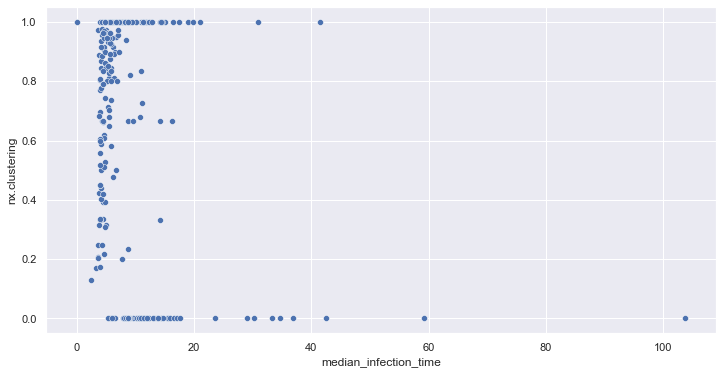

For metric: nx.clustering Spearmans correlation coefficient: -0.103. Samples are uncorrelated p=0.0848


In [89]:
for metric in ['betweenness_centrality', 'degree_centrality', 'closeness_centrality', 'nx.clustering']:
    sns.scatterplot(data=airports, y=metric, x='median_infection_time')
    plt.show()
    coef, p = spearmanr(airports[metric], airports['median_infection_time'])
    print(f'For metric: {metric} Spearmans correlation coefficient: {coef:.3}. Samples are ' + ('uncorrelated' if p > 0.05 else 'correlated') + f' p={p:.3}')

#### Вывод - основное заражение приходится на первые 10 часов и длится примерно 20 часов.
#### А со временем заражения, как видно по скаттер-плотам,да и по здравому смыслу,наиболее скоррелирована closeness_centrality - степень близости узла к другим узлам.